Import libraries:

In [81]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import requests
import imutils

Load and show smartphones:

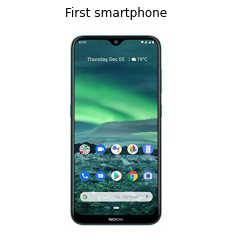

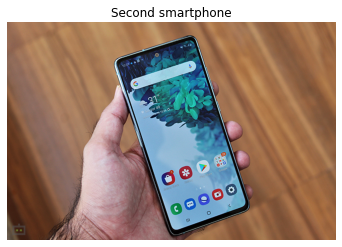

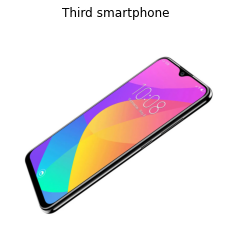

In [216]:
url_list = ['https://images-na.ssl-images-amazon.com/images/I/41mTHPrY0uL.jpg',
            'https://www.gizbot.com/images/2020-10/samsung-galaxy-s20-fe-reviews_160207321040.jpg',
            'https://funtech.pl/pol_pl_Smartphone-Oukitel-Y4800-6\
-128-DS-Black-15104_5.jpg']

smart_1 = np.asarray(Image.open(requests.get(url_list[0], stream=True).raw))
imgplot = plt.imshow(smart_1)
plt.title('First smartphone')
plt.axis('off')
_= plt.show()

smart_2 = np.asarray(Image.open(requests.get(url_list[1], stream=True).raw))
imgplot = plt.imshow(smart_2)
plt.title('Second smartphone')
plt.axis('off')
_= plt.show()

smart_3 = np.asarray(Image.open(requests.get(url_list[2], stream=True).raw))
imgplot = plt.imshow(smart_3)
plt.title('Third smartphone')
plt.axis('off')
_= plt.show()



Convert to gray scale:

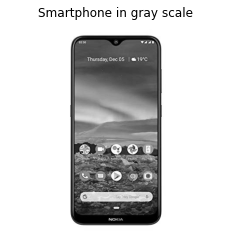

In [168]:
smart_1_gray = cv2.cvtColor(smart_1, cv2.COLOR_BGR2GRAY)

imgplot = plt.imshow(smart_1_gray,cmap = 'gray')
plt.title('Smartphone in gray scale')
plt.axis('off')
_= plt.show()

Blur the photo:

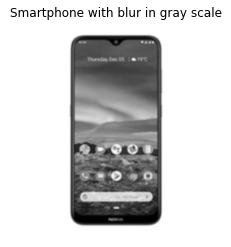

In [186]:
smart_1_blur = cv2.GaussianBlur(smart_1_gray,ksize = (7,7),sigmaX = 0)

imgplot = plt.imshow(smart_1_blur,cmap = 'gray')
plt.title('Smartphone with blur in gray scale')
plt.axis('off')
_= plt.show()

Smartphone with Contours:

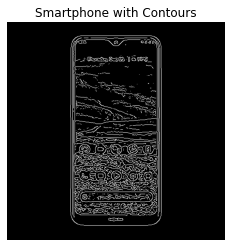

In [187]:
imgplot = plt.imshow(cv2.Canny(smart_1_blur, 20,20),cmap = 'gray')
plt.title('Smartphone with Contours')
plt.axis('off')
_= plt.show()

Contours detection:

In [188]:
contures = cv2.findContours(image = cv2.Canny(smart_1_blur, 20,20).copy(),
                           mode = cv2.RETR_TREE,
                           method = cv2.CHAIN_APPROX_SIMPLE)

contures = imutils.grab_contours(contures)
contures = sorted(contures,key=cv2.contourArea,reverse=True)[:10]

Draw the biggest contour:

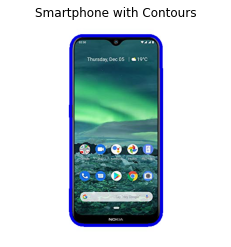

In [191]:
smart_1_with_contour = cv2.drawContours(image = smart_1.copy(),
                                       contours = [contures[1]],
                                       contourIdx = -1,
                                       color =(0,0,225),
                                       thickness = 5)

imgplot = plt.imshow(smart_1_with_contour)
plt.title('Smartphone with Contours')
plt.axis('off')
_= plt.show()

Create function which take link to photo and return smartphone picute with contours:

In [212]:
def find_smartphone_contoure(url):
    
    # Load image as array
    img = np.asarray(Image.open(requests.get(url, stream=True).raw))
    # Convert image to gray scale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Make blur image
    img_blur = cv2.GaussianBlur(img_gray,ksize = (5,5),sigmaX = 0)
    
    # Find contours on image
    contures = cv2.findContours(image = cv2.Canny(img_blur, 100,100).copy(),
                           mode = cv2.RETR_TREE,
                           method = cv2.CHAIN_APPROX_SIMPLE)
    
    contures = imutils.grab_contours(contures)
    contures = sorted(contures,key=cv2.contourArea,reverse=True)[:10]
    
    # Draw the smartphone contour on orginal picture
    img_with_contour = cv2.drawContours(image = img.copy(),
                                       contours = [contures[1]],
                                       contourIdx = -1,
                                       color =(0,0,225),
                                       thickness = 8)

    imgplot = plt.imshow(img_with_contour)
    plt.title('Smartphone with Contours')
    plt.axis('off')
    _= plt.show()

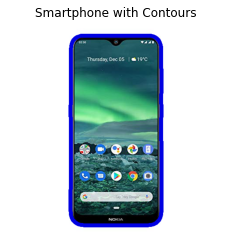

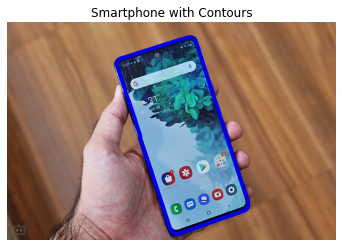

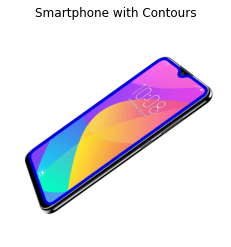

In [217]:
for url in url_list:
    find_smartphone_contoure(url)